In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from datetime import datetime

In [3]:
df = pd.read_csv('TCS Historical Data.csv')

df.head(2)

,Date,Price,Open,High,Low,Vol.,Change %
0,27-06-2025,"3,441.10","3,455.00","3,466.40","3,431.00",1.78M,-0.02%
1,26-06-2025,"3,441.80","3,444.80","3,451.40","3,415.30",2.88M,-0.09%


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2477 non-null   object
 1   Price     2477 non-null   object
 2   Open      2477 non-null   object
 3   High      2477 non-null   object
 4   Low       2477 non-null   object
 5   Vol.      2477 non-null   object
 6   Change %  2477 non-null   object
dtypes: object(7)
memory usage: 135.6+ KB


In [ ]:
# Clean datas
df.columns = df.columns.str.strip()

df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

# optional 
for col in ['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']:
    df[col] = df[col].astype(str).str.replace(',', '').str.replace('%', '').str.strip()

# Convert to numeric values for further
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
df['High'] = pd.to_numeric(df['High'], errors='coerce')
df['Low'] = pd.to_numeric(df['Low'], errors='coerce')
df['Change %'] = pd.to_numeric(df['Change %'], errors='coerce')

df.dropna(inplace=True)


C:\Users\subha\AppData\Local\Temp\ipykernel_21324\3436206443.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
# Making a target column that marks 1 if the prize grows and 0 for down 
df['Target'] = (df['Price'].shift(-1) > df['Price']).astype(int)

# Creating rolling avg for better estimation as for each day it have many values lead to volatility
df['MA5'] = df['Price'].rolling(window=5).mean()
df['MA10'] = df['Price'].rolling(window=10).mean()
df['Price_Change'] = df['Price'].pct_change()

df = df[:-1]


In [7]:
df

,Date,Price,Open,High,Low,Vol.,Change %,Target,MA5,MA10,Price_Change
2476,2015-06-29,1271.11,1260.86,1276.55,1246.84,1.37M,0.00,0,NaN,NaN,NaN
2475,2015-06-30,1250.54,1267.24,1269.07,1245.18,1.55M,-1.62,1,NaN,NaN,-0.016183
2474,2015-07-01,1271.21,1256.89,1278.51,1253.39,1.28M,1.65,0,NaN,NaN,0.016529
2473,2015-07-02,1263.68,1274.59,1276.04,1260.40,1.45M,-0.59,1,NaN,NaN,-0.005923
2472,2015-07-03,1276.50,1261.38,1279.49,1259.88,963.47K,1.01,1,1266.608,NaN,0.010145
...,...,...,...,...,...,...,...,...,...,...,...
5,2025-06-20,3435.70,3425.00,3446.30,3410.90,2.35M,0.34,0,3464.540,3455.93,0.003417
4,2025-06-23,3393.60,3415.00,3425.00,3370.00,3.12M,-1.23,0,3444.000,3453.10,-0.012254
3,2025-06-24,3390.40,3434.60,3442.10,3382.00,3.40M,-0.09,1,3419.020,3445.85,-0.000943
2,2025-06-25,3444.80,3407.30,3450.00,3400.00,1.76M,1.60,0,3417.700,3443.14,0.016045


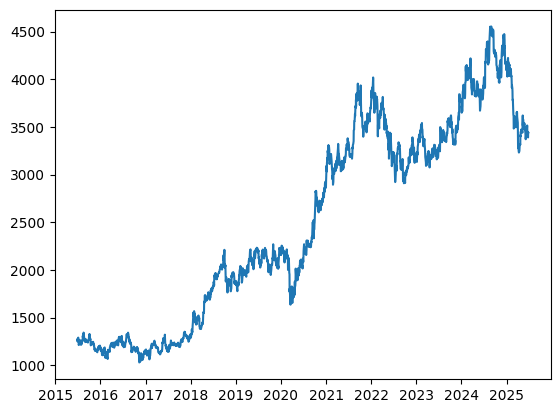

In [8]:
plt.plot(df.Date, df.Price)

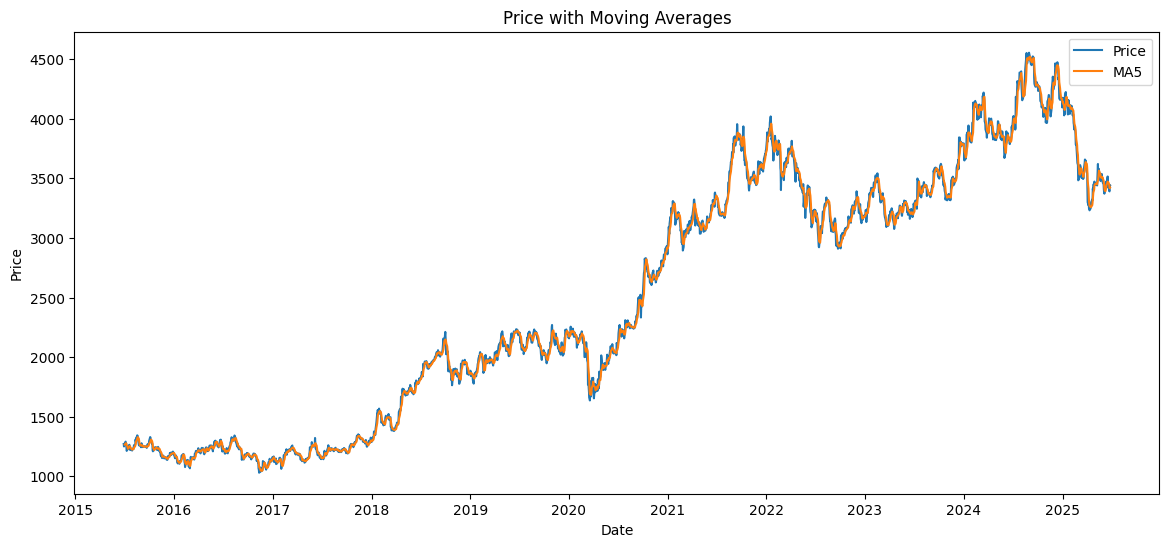

In [9]:
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Price'], label='Price')
plt.plot(df['Date'], df['MA5'], label='MA5')
# plt.plot(df['Date'], df['MA10'], label='MA10')
plt.title('Price with Moving Averages')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [ ]:
features = ['Open', 'High', 'Low', 'MA5', 'MA10', 'Price_Change']
X = df[features]
y = df['Target']

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

split = int(0.8 * len(df))
X_train, X_test = X_scaled[:split], X_scaled[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)
# y_proba = model.predict_proba(X_test)

import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)


C:\Users\subha\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [22:26:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [12]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Show predicted probabilities for up/down
proba_df = pd.DataFrame(y_proba, columns=['Prob_Down', 'Prob_Up'])
# proba_df['Date'] = df['Date'].iloc[split:].values
proba_df['Actual'] = y_test.values
proba_df['Predicted'] = y_pred
print(proba_df.head())

[[182  72]
 [161  81]]
              precision    recall  f1-score   support

           0       0.53      0.72      0.61       254
           1       0.53      0.33      0.41       242

    accuracy                           0.53       496
   macro avg       0.53      0.53      0.51       496
weighted avg       0.53      0.53      0.51       496

   Prob_Down   Prob_Up  Actual  Predicted
0   0.249171  0.750829       1          1
1   0.841007  0.158993       0          0
2   0.171288  0.828712       1          1
3   0.178604  0.821396       1          1
4   0.279737  0.720263       1          1


In [ ]:
# Just taking a value to test
latest = df[features].iloc[-1:]
latest_scaled = scaler.transform(latest)
# prediction = model.predict(latest_scaled)
# probability = model.predict_proba(latest_scaled)
prediction = xgb_model.predict(latest_scaled)
probability = xgb_model.predict_proba(latest_scaled)

print("Predicted Movement: ", "Up" if prediction[0]==1 else "Down")
print("Probability Up: {:.2f}%".format(probability[0][1]*100))
print("Probability Down: {:.2f}%".format(probability[0][0]*100))

Predicted Movement:  Down
Probability Up: 32.89%
Probability Down: 67.11%


In [ ]:
from sklearn.metrics import accuracy_score

# actual up and down counts in the dataset
actual_up = np.sum(y_test == 1)
actual_down = np.sum(y_test == 0)

# generated up and down counts by model
pred_up = np.sum(y_pred == 1)
pred_down = np.sum(y_pred == 0)

accuracy = accuracy_score(y_test, y_pred) * 100

print("Actual Movement Counts:")
print(f"Up Days:   {actual_up}")
print(f"Down Days: {actual_down}\n")

print("Predicted Movement Counts:")
print(f"Predicted Up:   {pred_up}")
print(f"Predicted Down: {pred_down}\n")

print("Accuracy of the model: {:.2f}%".format(accuracy))


Actual Movement Counts:
Up Days:   242
Down Days: 254

Predicted Movement Counts:
Predicted Up:   153
Predicted Down: 343

Accuracy of the model: 53.02%


In [ ]:
import joblib

joblib.dump(xgb_model, "model.pkl")
joblib.dump(scaler, "scaler.pkl")
df.to_csv("stock_data.csv", index=False)


['scaler.pkl']